**CRISP-DM**

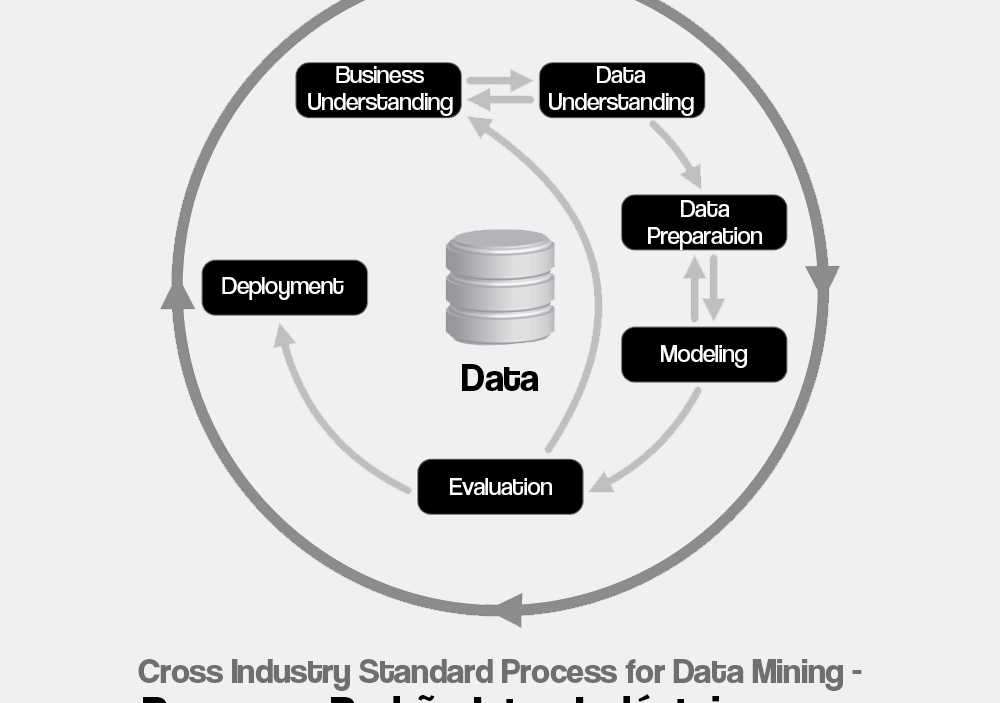

# Installation

In [1]:
#!pip install geopandas
!pip install folium

# Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

import statistics as sts
from scipy import stats

# Business understanding - Entendimento do negócio
* "Identificar objetivos do negócio sem vieses inconscientes."
* https://dnc.group/blog/data-science/metodologia-crisp-dm/

# Data understanding - Entendimento dos dados
* Ver de onde virão seus dados e entendê-los de acordo com o objetivo levantado.
* https://dnc.group/blog/data-science/metodologia-crisp-dm/

Link do dataset: https://catalog.data.gov/dataset/crime-data-from-2020-to-present


**Descrição das variáveis do dataset**:

**Incident ID**: Identificador único do incidente ou ocorrência.

**Offence Code**: Código do tipo de crime ou delito que ocorreu.

**CR Number**: Número do relatório de ocorrência registrado pela polícia.

**Dispatch Date / Time**: Data e hora em que a polícia foi despachada para atender a ocorrência.

**NIBRS Code**: Código de categoria do National Incident-Based Reporting System (NIBRS) usado para relatar crimes às agências de aplicação da lei nos Estados Unidos.

**Victims**: Número de vítimas envolvidas no incidente.

**Crime Name1**, **Crime Name2**, **Crime Name3**: Nomes do crime ou delito cometido.

**Police District Name**: Nome do distrito policial responsável pela área em que ocorreu o incidente.

**Block Address**: Endereço do incidente com o número do quarteirão.

**City**: Cidade em que ocorreu o incidente.

**State**: Estado em que ocorreu o incidente.

**Zip Code**: Código postal da área onde ocorreu o incidente.

**Agency**: Nome da agência de aplicação da lei que atendeu ao incidente.

**Place**: Descrição do local do incidente, como um edifício ou uma rua.

**Sector**: Setor ou área designada da cidade em que ocorreu o incidente.

**Beat**: Distrito ou área policial específica responsável pelo atendimento ao incidente.

**PRA**: Área de análise e planejamento policial que se concentra na redução da criminalidade.

**Address Number**: Número do endereço do incidente.

**Street Prefix, Street Name, Street Suffix, Street Type**: Componentes do endereço do incidente.

**Start_Date_Time**: Data e hora de início do incidente.

**End_Date_Time**: Data e hora de término do incidente, se aplicável.

**Latitude**, **Longitude**: Coordenadas geográficas do local do incidente.

**Police District Number**: Número do distrito policial responsável pela área em que ocorreu o incidente.

**Location**: Informações adicionais sobre a localização do incidente, como um marco ou referência geográfica.

In [3]:
PATH = "C://Users//samue//Desktop//Data Science//Datasets//Crime.csv"

In [4]:
df = pd.read_csv(PATH, sep=',', low_memory=False)

In [5]:
df.head()

Incident ID Offence Code  CR Number    Dispatch Date / Time NIBRS Code  \
0    201219928         1204  180063894  12/21/2018 09:13:13 PM        120   
1    201301798         5016  200035833  09/13/2020 12:26:58 AM        90Z   
2    201221577         5404  190000342  01/03/2019 02:48:47 AM        90D   
3    201221577         9053  190000342  01/03/2019 02:48:47 AM        90Z   
4    201294935         2303  200027681  07/16/2020 05:29:50 PM        23C   

   Victims             Crime Name1                  Crime Name2  \
0        1  Crime Against Property                      Robbery   
1        1   Crime Against Society           All Other Offenses   
2        1   Crime Against Society  Driving Under the Influence   
3        1                   Other           All Other Offenses   
4        1  Crime Against Property                  Shoplifting   

                                  Crime Name3 Police District Name  ...  \
0                        ROBBERY - STREET-GUN              WHEATON  ...   
1  OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           GERMANTOWN  ...   
2          DRIVING UNDER THE INFLUENCE LIQUOR            ROCKVILLE  ...   
3                     LITTERING/TRASH DUMPING            ROCKVILLE  ...   
4                       LARCENY - SHOPLIFTING           GERMANTOWN  ...   

  Street Prefix Street Name Street Suffix  Street Type  \
0           NaN     GEORGIA           NaN          AVE   
1           NaN    COLTRANE           NaN           DR   
2             N     GRANDIN           NaN          AVE   
3             N     GRANDIN           NaN          AVE   
4           NaN   FREDERICK           NaN           RD   

          Start_Date_Time           End_Date_Time   Latitude  Longitude  \
0  12/21/2018 09:13:00 PM                     NaN  39.036270 -77.049900   
1  08/08/2020 05:10:00 PM  08/08/2020 12:00:00 AM  39.277840 -77.211500   
2  01/03/2019 02:48:00 AM  01/03/2019 02:48:00 AM  39.086688 -77.144754   
3  01/03/2019 02:48:00 AM  01/03/2019 02:48:00 AM  39.086688 -77.144754   
4  07/16/2020 05:29:00 PM                     NaN  39.198295 -77.244900   

  Police District Number             Location  
0                     4D  (39.0363, -77.0499)  
1                     5D  (39.2778, -77.2115)  
2                     1D  (39.0867, -77.1448)  
3                     1D  (39.0867, -77.1448)  
4                     5D  (39.1983, -77.2449)  

[5 rows x 30 columns]

In [6]:
df.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [7]:
#Removendo os espaços do dataset
df.columns = df.columns.str.title().str.replace(' ', '')

In [8]:
df.shape

(326191, 30)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326191 entries, 0 to 326190
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   IncidentId            326191 non-null  int64  
 1   OffenceCode           326191 non-null  object 
 2   CrNumber              326191 non-null  int64  
 3   DispatchDate/Time     276923 non-null  object 
 4   NibrsCode             326191 non-null  object 
 5   Victims               326191 non-null  int64  
 6   CrimeName1            325897 non-null  object 
 7   CrimeName2            325897 non-null  object 
 8   CrimeName3            325897 non-null  object 
 9   PoliceDistrictName    326098 non-null  object 
 10  BlockAddress          298588 non-null  object 
 11  City                  324916 non-null  object 
 12  State                 326191 non-null  object 
 13  ZipCode               323008 non-null  float64
 14  Agency                326191 non-null  object 
 15  

## Mudando o type da coluna

In [10]:
#Convertendo a coluna dispatchDate/Time para o datetime
df['DispatchDate/Time'] = pd.to_datetime(df['DispatchDate/Time'])

## Statistics

### Média

Basicamente é a soma dos números divido pela quantidade de números.



In [11]:
df['Victims'].sum() / df['Victims'].count()

1.0229006931521716

In [12]:
np.mean(df['Victims'])

1.0229006931521716

### Mediana

A mediana é uma medida de tendência central que representa o valor que divide um conjunto de dados em duas partes iguais, ou seja, 50% dos valores estão acima da mediana e 50% dos valores estão abaixo dela.

A mediana é útil em situações em que os dados estão muito espalhados ou quando há valores extremos que afetam a média, pois a mediana não é afetada por valores extremos ou **outliers**. Além disso, a mediana é fácil de calcular e interpretar.

Para calcular a mediana, é necessário ordenar os valores em ordem crescente ou decrescente e encontrar o valor central. Se houver um número **par** de valores, a mediana é a média dos dois valores centrais. Se houver um número **ímpar** de valores, a mediana é o valor central.

In [13]:
np.median(df['Victims'])

1.0

### Moda

Valor mais frequente de uma amostra, uma população, ou uma distribuição de probabilidade.

In [14]:
import statistics

In [15]:
statistics.mode(df['Victims'])

1

### Desvio Padrão


O desvio padrão é uma medida estatística que indica o quão dispersos estão os valores em relação à média de um conjunto de dados. 
Um desvio padrão baixo indica que a maioria dos valores está próxima da média, enquanto um desvio padrão alto indica que os valores estão mais espalhados.

In [16]:
np.std(df['Victims'])

0.19370274296724513

### Quartis (Q1, Q2, Q3)  - Diferenca_interquartil

Quartis são medidas estatísticas que dividem um conjunto de dados ordenados em quatro partes iguais. Esses quartis são utilizados para avaliar a distribuição dos dados e identificar possíveis anomalias ou tendências.

O primeiro quartil, ou Q1, é o valor que divide os dados em 25% inferiores e 75% superiores. O segundo quartil, ou mediana, é o valor que divide os dados em 50% inferiores e 50% superiores. O terceiro quartil, ou Q3, é o valor que divide os dados em 75% inferiores e 25% superiores.

Os quartis são muito úteis para identificar a presença de **outliers** ou valores extremos em um conjunto de dado

In [17]:
numeros = [11, 15, 30, 40, 58, 60, 70, 80, 90]

In [18]:
#1 quartil
np.percentile(numeros, 25)

30.0

In [19]:
#2 quartil, mediana
np.percentile(numeros, 50)

58.0

In [20]:
#3 quartil
np.percentile(numeros, 75)

70.0

#### Amplitude total e diferença interquartil

Os quartis também são utilizados para calcular outras medidas estatísticas importantes, como a amplitude interquartil (IQR), que é a diferença entre o terceiro e o primeiro quartil, e o limite superior (LS) e o limite inferior (LI), que são valores usados para identificar possíveis outliers em um conjunto de dados.

In [21]:
numeros = [13, 11, 15, 20, 25, 30, 35, 40, 45, 50, 1000]

In [22]:
amplitude = df['Victims'].max() - df['Victims'].min()
amplitude

21

In [23]:
q1 = np.percentile(numeros, 25)
q3 = np.percentile(numeros, 75)
q1, q3

(17.5, 42.5)

In [24]:
diferenca_interquartil = q3 - q1
diferenca_interquartil

25.0

In [25]:
inferior = q1 - (1.5 * diferenca_interquartil)
inferior

-20.0

In [26]:
superior = q3 + (1.5 * diferenca_interquartil)
superior

80.0

### Describe

In [27]:
df.describe()

IncidentId      CrNumber        Victims        ZipCode  \
count  3.261910e+05  3.261910e+05  326191.000000  323008.000000   
mean   2.012467e+08  1.723934e+08       1.022901   20876.520563   
std    9.198538e+04  6.139474e+07       0.193703     164.966474   
min    2.010871e+08  1.001107e+07       1.000000       6.000000   
25%    2.011673e+08  1.705492e+08       1.000000   20853.000000   
50%    2.012458e+08  1.900304e+08       1.000000   20878.000000   
75%    2.013261e+08  2.100122e+08       1.000000   20904.000000   
max    2.014069e+08  3.300378e+08      22.000000   29882.000000   

       AddressNumber       Latitude      Longitude  
count   2.986900e+05  326191.000000  326191.000000  
mean    8.396232e+03      37.816325     -74.618473  
std     1.596143e+04       6.917999      13.648982  
min     1.000000e+00       0.000000     -77.516753  
25%     1.600000e+03      39.017948     -77.196428  
50%     8.100000e+03      39.071346     -77.098667  
75%     1.250000e+04      39.141812     -77.028136  
max     2.090600e+06      90.000000       0.000000

### Skewness / assimetria

**Skewness**

Medida da falta de simetria de uma determinada distribuição probabilística.

* $>0$ - Assimetria Positiva - Cauda direita - valores acima da média mais pesada
* $<0$ - Assimetria Negativa - Cauda esquerda - valores abaixo da média mais pesada
* $0$ - Simetria - Mesmo que uma distribuição Normal

https://yashowardhanshinde.medium.com/what-is-skewness-in-data-how-to-fix-skewed-data-in-python-a792e98c0fa6

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/assimetria2.png?raw=1" alt="assimetria" style="width: 600px;"/>

<img src="https://miro.medium.com/max/640/1*tSEpN8McF1r4Pi8uf_2BnA.png" alt="assimetria" style="width: 600px;"/>

**Distribuição normal**
- Média = Mediana = Moda

**Distribuição com assimetria à esquerda ou assimetria negativa**
- Moda > Mediana > Média

**Distribuição com assimetria à direita ou assimetria positiva**
- Média > Mediana > Moda

In [28]:
df['Victims'].mean(), df['Victims'].median(), statistics.mode(df['Victims'])

(1.0229006931521716, 1.0, 1)

In [29]:
#Skewness
df['Victims'].skew()

16.08435560226042

### Kurtosis

**Kurtosis**

Curtose é uma medida de forma que caracteriza o **achatamento** da curva de uma distribuição probabilística.

* $3$ - Mesocúrtica (Mesmo que uma distribuição Normal)
* $< 3$ - Platicúrtica (mais "achatada" que a distribuição Normal)
* $> 3$ - Leptocúrtica (mais "alta" e "afunilada" e concentrada que a distribuição Normal)

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/curtose.png?raw=1" alt="curtose" style="width: 600px;"/>

In [30]:
df['Victims'].kurt()

674.7826340469214

### Correlação

**Correlação**


https://medium.com/@ds.m/scatter-plot-6fa3a954975f


Qualquer relação estatística (causal ou não causal) entre duas variáveis. Varia entre $-1$ e $1$:

* $0$ - Nenhuma correlação
* $+1$ - Correlação/Associação positiva perfeita
* $-1$ - Correlação/Associação negativa perfeita


<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/correlacao.png?raw=1" alt="correlação" style="width: 600px;"/>

* Primeira Fileira: Exemplos de correlações entre $-1$ e $1$
* Segunda Fileira: Correlação não altera a inclinação (*slope*) entre duas variáveis
* Terceira Fileira: Exemplos de relações não-lineares (Correlação é $0$)

In [31]:
df.corr()

IncidentId  CrNumber   Victims   ZipCode  AddressNumber  \
IncidentId       1.000000  0.759913  0.013533  0.000837       0.000003   
CrNumber         0.759913  1.000000  0.008236  0.006518       0.000311   
Victims          0.013533  0.008236  1.000000  0.002440       0.002660   
ZipCode          0.000837  0.006518  0.002440  1.000000      -0.000014   
AddressNumber    0.000003  0.000311  0.002660 -0.000014       1.000000   
Latitude        -0.230720 -0.122390  0.002883  0.003765      -0.042001   
Longitude        0.230666  0.122346 -0.002753 -0.003358       0.043239   

               Latitude  Longitude  
IncidentId    -0.230720   0.230666  
CrNumber      -0.122390   0.122346  
Victims        0.002883  -0.002753  
ZipCode        0.003765  -0.003358  
AddressNumber -0.042001   0.043239  
Latitude       1.000000  -0.999864  
Longitude     -0.999864   1.000000

## Valores Nulos - Valores Duplicados

In [32]:
(df.isnull().sum() / df.shape[0]) * 100

IncidentId               0.000000
OffenceCode              0.000000
CrNumber                 0.000000
DispatchDate/Time       15.104034
NibrsCode                0.000000
Victims                  0.000000
CrimeName1               0.090131
CrimeName2               0.090131
CrimeName3               0.090131
PoliceDistrictName       0.028511
BlockAddress             8.462220
City                     0.390875
State                    0.000000
ZipCode                  0.975809
Agency                   0.000000
Place                    0.000000
Sector                   0.650233
Beat                     0.650233
Pra                      0.077868
AddressNumber            8.430950
StreetPrefix            95.506927
StreetName               0.000307
StreetSuffix            98.322762
StreetType               0.105766
Start_Date_Time          0.000000
End_Date_Time           52.974178
Latitude                 0.000000
Longitude                0.000000
PoliceDistrictNumber     0.000000
Location      

In [33]:
df.duplicated().sum() 

0

In [34]:
df.dropna(subset=['CrimeName1', 'CrimeName2', 'CrimeName3',
                  'PoliceDistrictName', 'BlockAddress',
                  'City', 'ZipCode', 'Sector', 'Beat', 'Pra',
                  'AddressNumber', 'StreetType'], inplace=True)

**Insights:** Removendo os valores nulos das colunas

In [35]:
df.shape

(292159, 30)

## Exploratory Data Analysis

Variáveis quantitativas: são variáveis que expressam uma quantidade numérica, podendo ser discretas ou contínuas.

- a) Variáveis quantitativas discretas: são variáveis que expressam valores inteiros ou quantidades contáveis, como número de filhos, número de carros, número de gols em um jogo de futebol, etc.

- b) Variáveis quantitativas contínuas: são variáveis que expressam valores numéricos que podem assumir qualquer valor em um intervalo contínuo, como altura, peso, temperatura, tempo de reação, etc    


**tipos de análise**
- análise univariada
- análise bivariada
- análise multivariada

**Tipos de dados**
- dados numéricos
- dados categóricos
    


In [36]:
df.columns

Index(['IncidentId', 'OffenceCode', 'CrNumber', 'DispatchDate/Time',
       'NibrsCode', 'Victims', 'CrimeName1', 'CrimeName2', 'CrimeName3',
       'PoliceDistrictName', 'BlockAddress', 'City', 'State', 'ZipCode',
       'Agency', 'Place', 'Sector', 'Beat', 'Pra', 'AddressNumber',
       'StreetPrefix', 'StreetName', 'StreetSuffix', 'StreetType',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'PoliceDistrictNumber', 'Location'],
      dtype='object')

**Filtrando o dataset**

In [37]:
df[df['CrimeName1'] == "Crime Against Property"].head(5)

IncidentId OffenceCode   CrNumber   DispatchDate/Time NibrsCode  Victims  \
0    201219928        1204  180063894 2018-12-21 21:13:13       120        1   
4    201294935        2303  200027681 2020-07-16 17:29:50       23C        1   
10   201299156        2203  200032643 2020-08-21 09:40:10       220        1   
13   201278428        2303  200006360 2020-02-07 16:26:04       23C        1   
17   201205383        2303  180045217 2018-09-10 18:00:59       23C        1   

                CrimeName1                      CrimeName2  \
0   Crime Against Property                         Robbery   
4   Crime Against Property                     Shoplifting   
10  Crime Against Property  Burglary/Breaking and Entering   
13  Crime Against Property                     Shoplifting   
17  Crime Against Property                     Shoplifting   

                                CrimeName3 PoliceDistrictName  ...  \
0                     ROBBERY - STREET-GUN            WHEATON  ...   
4                    LARCENY - SHOPLIFTING         GERMANTOWN  ...   
10  BURGLARY - FORCED ENTRY-NONRESIDENTIAL           BETHESDA  ...   
13                   LARCENY - SHOPLIFTING           BETHESDA  ...   
17                   LARCENY - SHOPLIFTING          ROCKVILLE  ...   

   StreetPrefix  StreetName StreetSuffix  StreetType         Start_Date_Time  \
0           NaN     GEORGIA          NaN         AVE  12/21/2018 09:13:00 PM   
4           NaN   FREDERICK          NaN          RD  07/16/2020 05:29:00 PM   
10          NaN  MAC ARTHUR          NaN         BLV  08/21/2020 03:30:00 AM   
13          NaN   DEMOCRACY          NaN         BLV  02/07/2020 04:26:00 PM   
17          NaN  HUNGERFORD          NaN          DR  09/10/2018 06:00:00 PM   

             End_Date_Time   Latitude  Longitude PoliceDistrictNumber  \
0                      NaN  39.036270 -77.049900                   4D   
4                      NaN  39.198295 -77.244900                   5D   
10  08/21/2020 03:45:00 AM  38.965620 -77.139000                   2D   
13                     NaN  39.022077 -77.147376                   2D   
17  09/10/2018 06:25:00 PM  39.092059 -77.153305                   1D   

               Location  
0   (39.0363, -77.0499)  
4   (39.1983, -77.2449)  
10   (38.9656, -77.139)  
13  (39.0221, -77.1474)  
17  (39.0921, -77.1533)  

[5 rows x 30 columns]

**Análise Univariada**

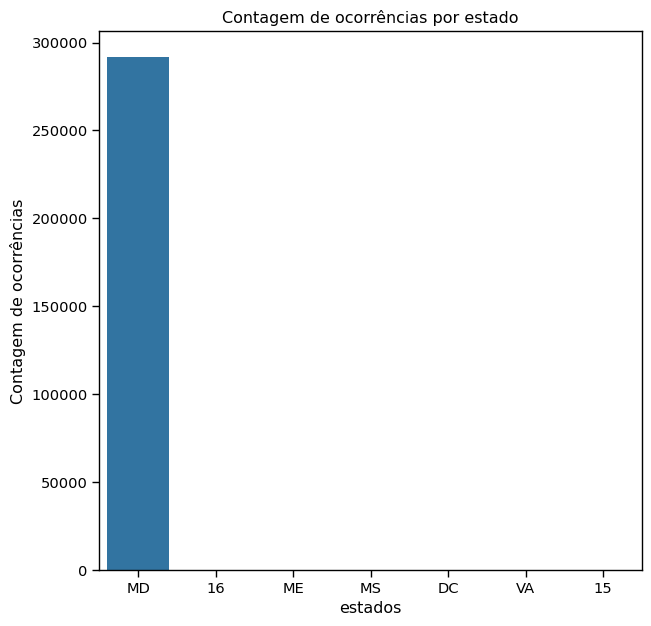

In [38]:
# Definir o tamanho da figura
plt.figure(figsize=(7,7))

# Definir o tamanho da fonte
sns.set_context("paper", font_scale=1.2)

# Criar o gráfico de barras
sns.countplot(x=df['State'])

# Adicionar título ao gráfico
plt.title('Contagem de ocorrências por estado')

# Adicionar rótulo ao eixo y
plt.xlabel('estados')

# Adicionar rótulo ao eixo x
plt.ylabel('Contagem de ocorrências')

# Mostrar o gráfico
plt.show()

In [39]:
df['State'].value_counts()

MD    291993
16       150
DC        10
ME         2
MS         2
VA         1
15         1
Name: State, dtype: int64

**Insights:**
- O estado de **Maryland** possui mais crimes em comparação com outros estados
- O estado de **Maryland** possui 291993 ocorrências de crimes, enquanto o estado de 'DC' possui 10 ocorrências de crimes.

In [40]:
#Pegando apenas as cidades que pertence a Maryland
df = df[df['State'] == "MD"]

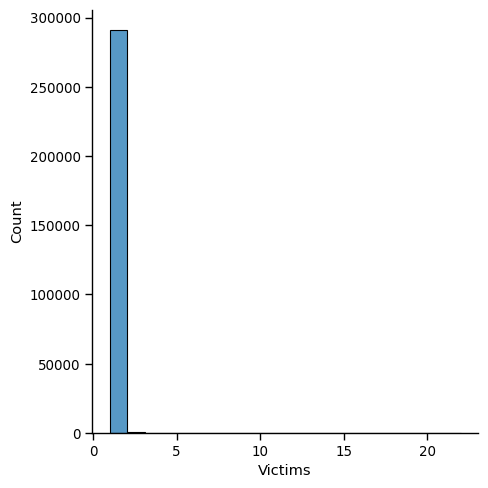

In [89]:
sns.displot(df['Victims'])

In [42]:
#df['Victims'].mean(), df['Victims'].median(), statistics.mode(df['Victims'])

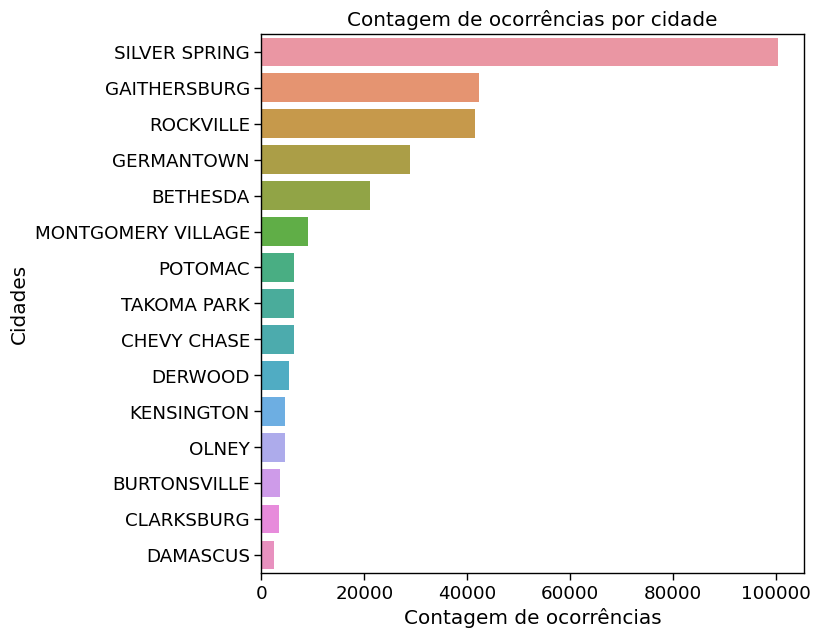

In [43]:
plt.figure(figsize=(7,7))
sns.set_context("paper", font_scale=1.5)
sns.countplot(y='City', data=df, order=df['City'].value_counts().index[0:15])
plt.title('Contagem de ocorrências por cidade')
plt.ylabel('Cidades')
plt.xlabel('Contagem de ocorrências')
plt.show()

**Insights:**
 - A cidade de Silver Spring possui uma taxa de criminalidade mais alta em comparação com outras cidades.

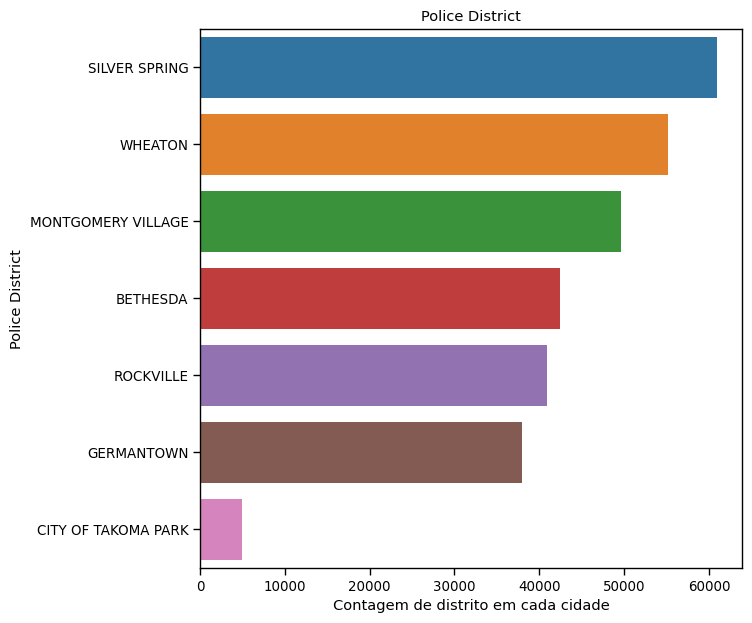

In [44]:
plt.figure(figsize=(7,7))
sns.set_context("paper", font_scale=1.1)
sns.countplot(y = 'PoliceDistrictName', data=df, order=df['PoliceDistrictName'].value_counts().index[0:15])
plt.title('Police District')
plt.ylabel('Police District')
plt.xlabel('Contagem de distrito em cada cidade')
plt.show()

**Insights:**
- Silver Spring tem mais distritos policiais em comparação com outras cidades.
- Silver Spring tem uma taxa de criminalidade mais alta em comparação com outras cidades, e com mais distritos policiais.

In [45]:
df['CrimeName1'].value_counts()

Crime Against Property    143146
Other                      63854
Crime Against Society      50716
Crime Against Person       30514
Not a Crime                 3763
Name: CrimeName1, dtype: int64

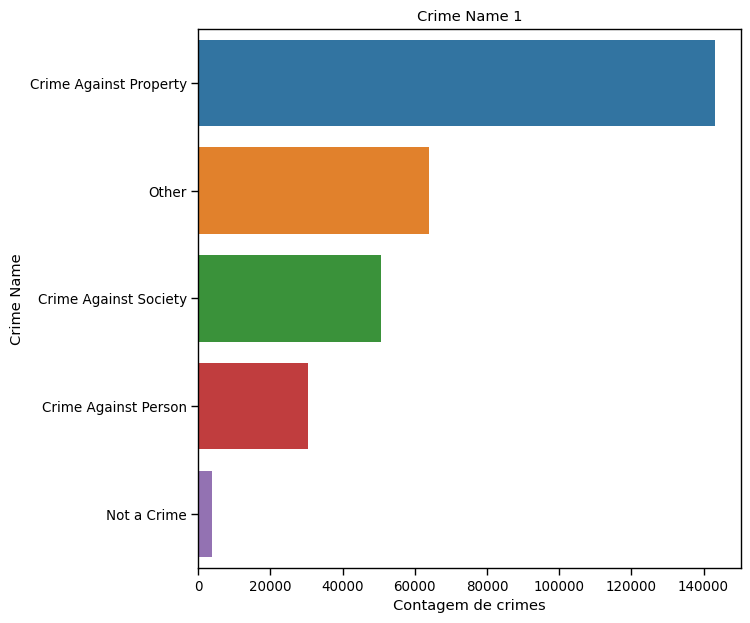

In [46]:
plt.figure(figsize=(7,7))
sns.set_context("paper", font_scale=1.1)
sns.countplot(y='CrimeName1', data=df, order=df['CrimeName1'].value_counts().index[0:10])
plt.title('Crime Name 1')
plt.ylabel('Crime Name')
plt.xlabel('Contagem de crimes')
plt.show()

**Insights:**
- O tipo de crime mais comum é Crime contra propriedade, com um total de 143146 casos registrados.
- O segundo tipo de crime mais comum é Other, com 63854 casos registrados.
- Crime Against Society é o terceiro tipo de crime mais comum, com um total de 50716 casos registrados.
- Crime Against Person é o quarto tipo de crime mais comum, com um total de 30514 casos registrados.
- A menor quantidade de ocorrências está em Not a Crime, com apenas 3763 casos registrados.

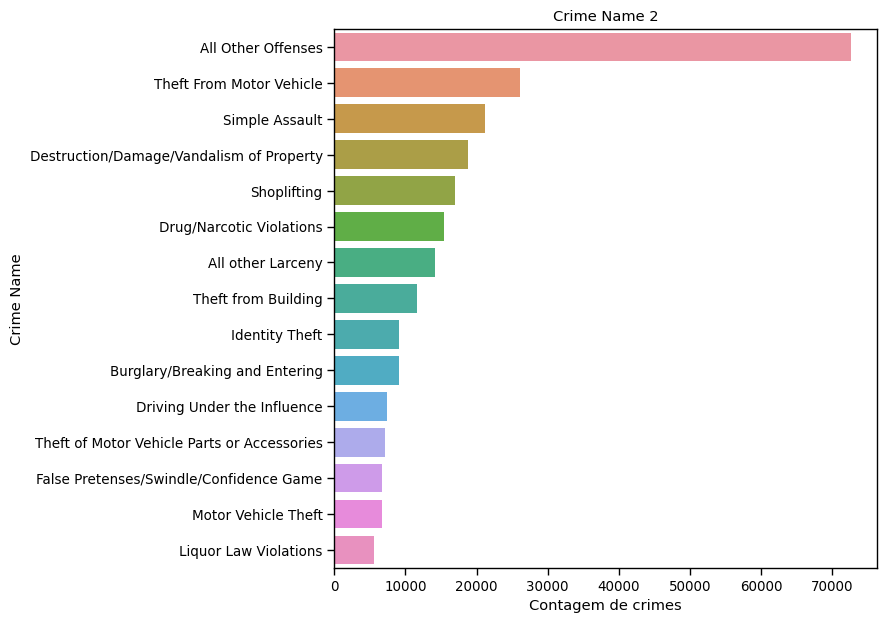

In [47]:
plt.figure(figsize=(7,7))
sns.set_context("paper", font_scale=1.1)
sns.countplot(y='CrimeName2', data=df, order=df['CrimeName2'].value_counts().index[0:15])
plt.title('Crime Name 2')
plt.ylabel('Crime Name')
plt.xlabel('Contagem de crimes')
plt.show()

**Insights:**
- O tipo de crime mais comum é "todas as outras ofensas".
- Já o crime de "violações da lei de bebidas alcoólicas" é um dos que menos ocorre em comparação com os outros tipos de crime.

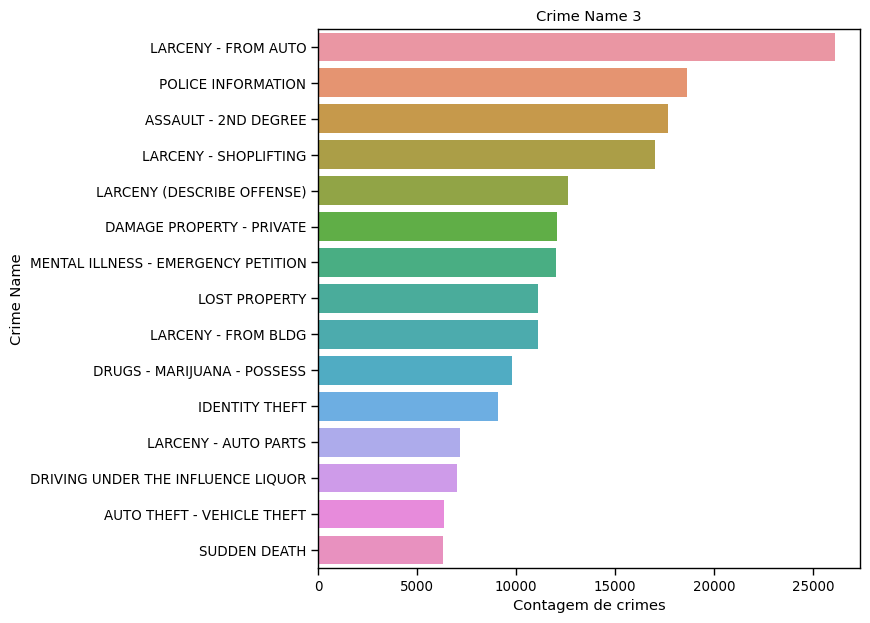

In [48]:
plt.figure(figsize=(7,7))
sns.set_context("paper", font_scale=1.1)
sns.countplot(y='CrimeName3', data=df, order=df['CrimeName3'].value_counts().index[0:15])
plt.title('Crime Name 3')
plt.ylabel('Crime Name')
plt.xlabel('Contagem de crimes')
plt.show()

**Place** Descrição do local do incidente, como um edifício ou uma rua.

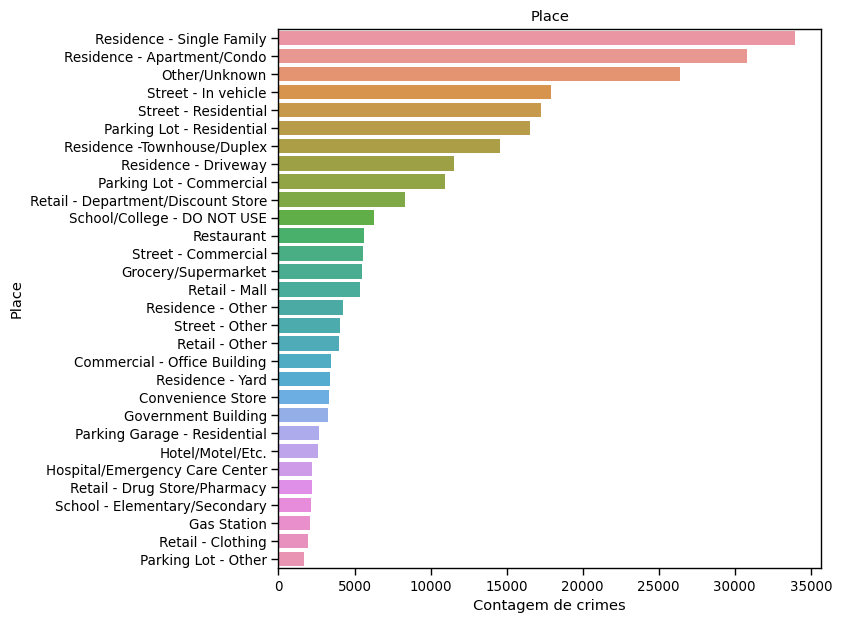

In [49]:
plt.figure(figsize=(7,7))
sns.set_context("paper", font_scale=1.1)
sns.countplot(y='Place', data=df, order=df['Place'].value_counts().index[0:30])
plt.title('Place')
plt.ylabel('Place')
plt.xlabel('Contagem de crimes')
plt.show()

In [50]:
df['Place'].value_counts()

Residence - Single Family            33972
Residence - Apartment/Condo          30822
Other/Unknown                        26409
Street - In vehicle                  17910
Street - Residential                 17233
                                     ...  
Industrial Site                          4
Dock/Wharf/Freight/Modal Terminal        4
Amusement Park                           3
Camp / Campground                        2
Rest Area                                1
Name: Place, Length: 99, dtype: int64

**Insights:**

- A maioria dos crimes ocorre em residências, sendo 33972 em casas unifamiliares e 30822 em apartamentos/condomínios.
- Os crimes ocorridos em veículos (17910) e em áreas residenciais (17233) também apresentam uma quantidade significativa em relação aos outros tipos de locais.
- A categoria "Outros/Desconhecidos" também apresenta uma quantidade significativa de 26409 ocorrências de crimes, porém sem especificar o local exato.

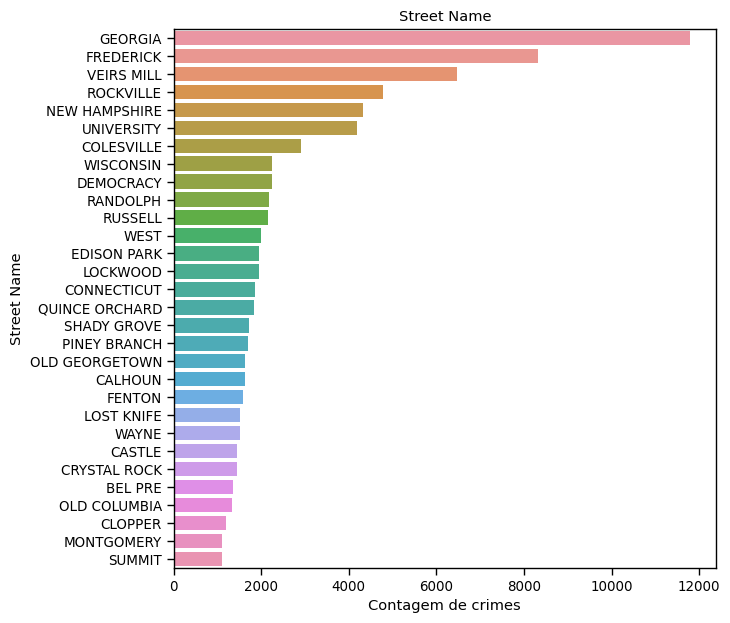

In [51]:
plt.figure(figsize=(7,7))
sns.set_context("paper", font_scale=1.1)
sns.countplot(y='StreetName', data=df, order=df['StreetName'].value_counts().index[0:30])
plt.title('Street Name')
plt.ylabel('Street Name')
plt.xlabel('Contagem de crimes')
plt.show()

**BoxPlot** / **Outliers**

Boxplot é utilizado para avaliar e comparar o formato, tendência central e variabilidade de distribuições de amostra, e para procurar por outliers. Por padrão, um boxplot demonstra a mediana, os quartis, o intervalo interquartil(IQR) e outliers para cada variável. 

<img src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png" alt="assimetria" style="width: 600px;"/>

<AxesSubplot: xlabel='Victims'>

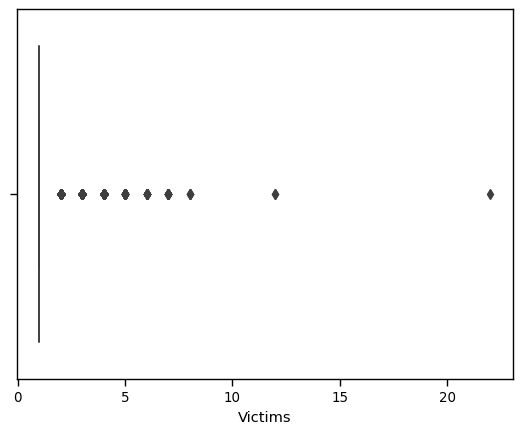

In [52]:
sns.boxplot(x='Victims', data=df)

<AxesSubplot: xlabel='Victims'>

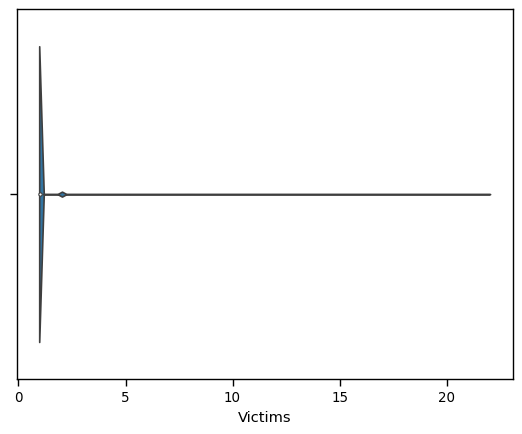

In [53]:
sns.violinplot(x='Victims', data=df)

- Nem todos os dados que estão fora dos limites são **Outliers** 


**Análise Bivariada**

Groupby
https://medium.com/data-hackers/8-coisas-que-voc%C3%AA-n%C3%A3o-sabia-sobre-o-pandas-groupby-b2c9033d7034

In [54]:
df.groupby(by=['City'])['Victims'].median()

City
ADELPHI               1.0
ASHTON                1.0
ASPEN HILL            1.0
BARNESVILLE           1.0
BEALLSVILLE           1.0
BELTSVILLE            1.0
BETHESDA              1.0
BOWIE                 1.0
BOYDS                 1.0
BRINKLOW              1.0
BROOKEVILLE           1.0
BURTONSVILLE          1.0
CABIN JOHN            1.0
CAPITOL HEIGHTS       1.0
CHEVY CHASE           1.0
CLARKSBURG            1.0
DAMASCUS              1.0
DERWOOD               1.0
DICKERSON             1.0
FREDERICK             1.0
GAITHERSBURG          1.0
GARRETT PARK          1.0
GERMANTOWN            1.0
GLEN ECHO             1.0
GREENBELT             1.0
HAGERSTOWN            1.0
HIGHLAND              1.0
KENSINGTON            1.0
LANHAM                1.0
LAUREL                1.0
MONTGOMERY VILLAGE    1.0
MOUNT AIRY            1.0
MT AIRY               1.0
NORTH POTOMAC         1.0
OLNEY                 1.0
POOLESVILLE           1.0
POTOMAC               1.0
ROCKVILLE             1.0
SANDY S

In [55]:
df.groupby(by='State')['Victims'].median()

State
MD    1.0
Name: Victims, dtype: float64

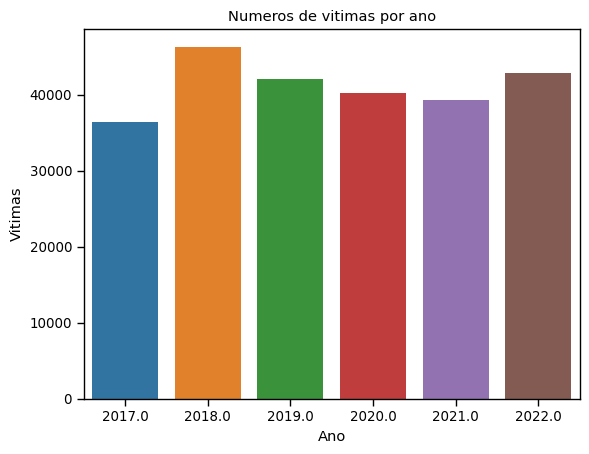

In [56]:
victims_count = df.groupby(df['DispatchDate/Time'].dt.year)['Victims'].count()
sns.barplot(x = victims_count.index, y= victims_count.values)
plt.xlabel('Ano')
plt.ylabel('Vitimas')
plt.title('Numeros de vitimas por ano')
plt.show()

In [57]:
victims_count

DispatchDate/Time
2017.0    36345
2018.0    46265
2019.0    42032
2020.0    40257
2021.0    39352
2022.0    42874
Name: Victims, dtype: int64

In [58]:
#Entre 2017 e 2018
#E a diferença entre o valor final e o valor inicial. 
#2018-2017 teve uma difença de 9920 ocorrencias
variacao_17_18 = 46265-36345
#(variação / valor inicial) * 100%
((variacao_17_18 / 36345) * 100)

27.29398816893658

In [59]:
anos = [2017,2018,2019,2020,2021,2022]
cont_vitimas = victims_count.values
porcentagem = []

for i in range(len(cont_vitimas)-1):
    variacao = abs(cont_vitimas[i+1] - cont_vitimas[i] )
    porcentagem = (variacao / cont_vitimas[i]) * 100
    #print(anos[i], "e", anos[i+1], "a porcentagem é de", np.around(porcentagem),"%")
    print("Variação percentual de vítimas entre {} e {}: {:.0f}%".format(anos[i],  anos[i+1], np.around(porcentagem)))

Variação percentual de vítimas entre 2017 e 2018: 27%
Variação percentual de vítimas entre 2018 e 2019: 9%
Variação percentual de vítimas entre 2019 e 2020: 4%
Variação percentual de vítimas entre 2020 e 2021: 2%
Variação percentual de vítimas entre 2021 e 2022: 9%


**Insights:**
- Houve um aumento de 27% na contagem de vítimas entre 2017 e 2018, seguido de aumentos menores nos anos seguintes: 9% entre 2018 e 2019, 4% entre 2019 e 2020, 2% entre 2020 e 2021 e 9% entre 2021 e 2022.

**Análise Multivariada**

In [60]:
df.groupby(by='City').agg({'Victims': ['count', 'mean', 'std'],
                           'PoliceDistrictName': 'count',
                          'Agency': 'count'}).sort_values(by=('Victims', 'count'), ascending=False)

Victims                     PoliceDistrictName  Agency
                     count      mean       std              count   count
City                                                                     
SILVER SPRING       100450  1.024510  0.202859             100450  100450
GAITHERSBURG         42244  1.026418  0.205649              42244   42244
ROCKVILLE            41448  1.023692  0.199448              41448   41448
GERMANTOWN           28830  1.034617  0.231233              28830   28830
BETHESDA             21184  1.013595  0.155784              21184   21184
MONTGOMERY VILLAGE    9084  1.037098  0.234740               9084    9084
POTOMAC               6380  1.013009  0.149158               6380    6380
TAKOMA PARK           6376  1.013959  0.142668               6376    6376
CHEVY CHASE           6278  1.008124  0.107535               6278    6278
DERWOOD               5389  1.011505  0.121307               5389    5389
KENSINGTON            4587  1.022237  0.207645               4587    4587
OLNEY                 4532  1.018094  0.154757               4532    4532
BURTONSVILLE          3645  1.021948  0.180136               3645    3645
CLARKSBURG            3390  1.027139  0.216945               3390    3390
DAMASCUS              2468  1.032010  0.233469               2468    2468
BOYDS                 1944  1.016461  0.142533               1944    1944
POOLESVILLE            914  1.027352  0.176109                914     914
BROOKEVILLE            907  1.018743  0.165052                907     907
ASHTON                 416  1.016827  0.128777                416     416
SANDY SPRING           400  1.025000  0.210918                400     400
DICKERSON              295  1.020339  0.141397                295     295
CABIN JOHN             225  1.008889  0.094070                225     225
SPENCERVILLE           151  1.006623  0.081379                151     151
GLEN ECHO               94  1.010638  0.103142                 94      94
BRINKLOW                75  1.000000  0.000000                 75      75
MOUNT AIRY              61  1.000000  0.000000                 61      61
LAUREL                  42  1.000000  0.000000                 42      42
BEALLSVILLE             41  1.000000  0.000000                 41      41
BARNESVILLE             37  1.054054  0.229243                 37      37
BELTSVILLE              24  1.000000  0.000000                 24      24
GARRETT PARK            23  1.000000  0.000000                 23      23
MT AIRY                 20  1.000000  0.000000                 20      20
HIGHLAND                 9  1.222222  0.440959                  9       9
WOODBINE                 8  1.000000  0.000000                  8       8
WASHINGTON GROVE         6  1.000000  0.000000                  6       6
LANHAM                   5  1.000000  0.000000                  5       5
NORTH POTOMAC            2  1.000000  0.000000                  2       2
ADELPHI                  2  1.000000  0.000000                  2       2
HAGERSTOWN               1  1.000000       NaN                  1       1
GREENBELT                1  1.000000       NaN                  1       1
FREDERICK                1  1.000000       NaN                  1       1
CAPITOL HEIGHTS          1  1.000000       NaN                  1       1
BOWIE                    1  1.000000       NaN                  1       1
ASPEN HILL               1  1.000000       NaN                  1       1
WASHINGTON               1  1.000000       NaN                  1       1

In [61]:
cidades_perigosas = df.groupby(['City', df['DispatchDate/Time'].dt.year]
                              ).agg({'Victims':['count', 'mean', 'median']}).sort_values([('Victims','count')], ascending=False).head(40).reset_index()

cidades_perigosas.head(10)

City DispatchDate/Time Victims                 
                                     count      mean median
0  SILVER SPRING            2018.0   16287  1.022718    1.0
1  SILVER SPRING            2019.0   14928  1.026259    1.0
2  SILVER SPRING            2022.0   14518  1.027759    1.0
3  SILVER SPRING            2020.0   13130  1.024676    1.0
4  SILVER SPRING            2021.0   12936  1.031231    1.0
5  SILVER SPRING            2017.0   12645  1.021431    1.0
6      ROCKVILLE            2018.0    6598  1.018187    1.0
7   GAITHERSBURG            2022.0    6439  1.029974    1.0
8      ROCKVILLE            2022.0    6356  1.032568    1.0
9   GAITHERSBURG            2018.0    6248  1.022727    1.0

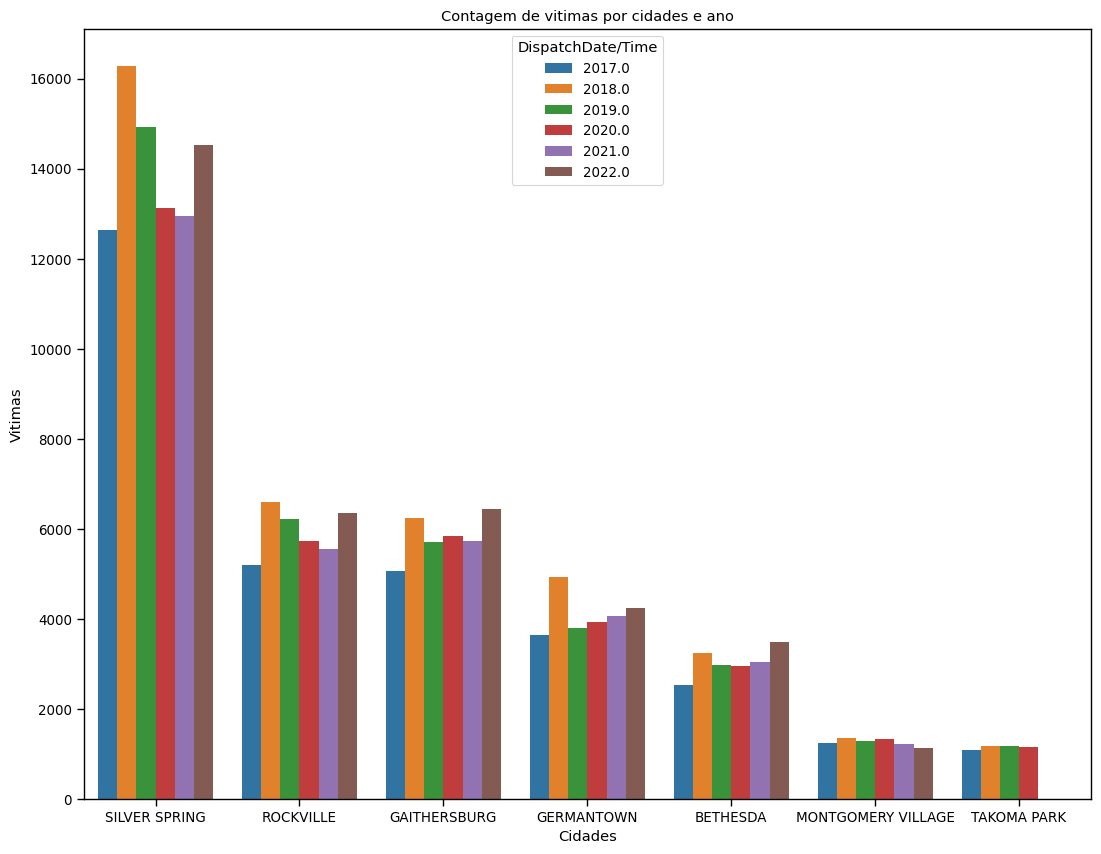

In [62]:
# Definir o tamanho da figura
plt.figure(figsize=(13, 10))

# Definir o tamanho da fonte
sns.set_context("paper", font_scale=1.1)

sns.barplot(x = cidades_perigosas.City, y=cidades_perigosas.Victims['count'], data=cidades_perigosas, hue='DispatchDate/Time')

plt.xlabel('Cidades')
plt.ylabel('Vitimas')
plt.title('Contagem de vitimas por cidades e ano')
plt.show()

**Insights:**

- No ano de 2017 foi o ano com menos crimes/vitimas, já no ano de 2018 teve um aumento de crimes nas cidades de Silver Spring, RockVille e Germantown.
- Um aumento de crimes no ano de 2022 nas cidades de Gaithersburg e Bethesda.

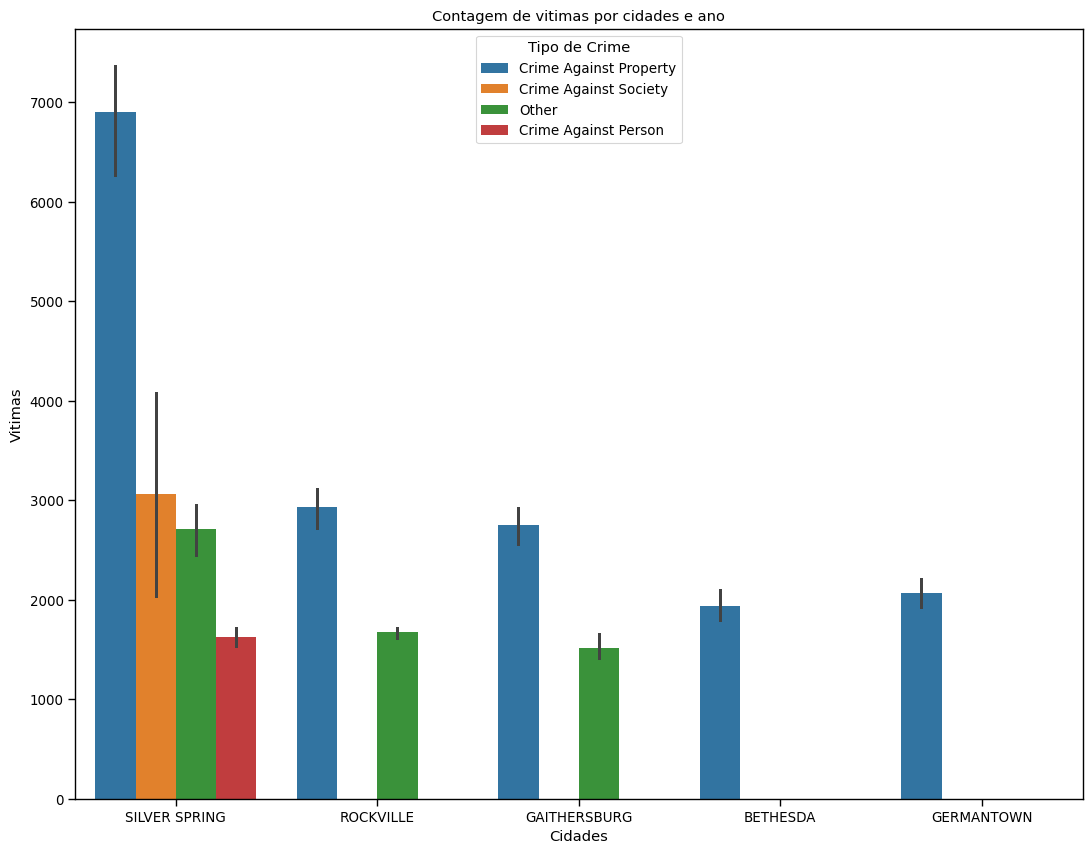

In [63]:
group_tipo_crime = df.groupby(['City', 'CrimeName1', df['DispatchDate/Time'].dt.year]
          ).agg({'Victims':'count'}
               ).sort_values(by=('Victims'), ascending=False).head(50).reset_index()

# Definir o tamanho da figura
plt.figure(figsize=(13, 10))

# Definir o tamanho da fonte
sns.set_context("paper", font_scale=1.1)

sns.barplot(x = 'City', y='Victims', data=group_tipo_crime, hue='CrimeName1')

plt.xlabel('Cidades')
plt.ylabel('Vitimas')
plt.title('Contagem de vitimas por cidades e ano')
plt.legend(title='Tipo de Crime')
plt.show()

A linha preta que aparece acima de cada barra no gráfico de barras representa a incerteza ou variabilidade dos dados. Ela é calculada com base na amostra de dados e é usada para indicar a precisão dos dados. Ela é geralmente baseada na distribuição normal, e é representada pelas barras finas acima e abaixo de cada barra.

A altura da linha preta indica a amplitude da incerteza ou variabilidade dos dados. **Quanto maior a linha, maior a incerteza ou variabilidade. Quanto menor a linha, menor a incerteza ou variabilidade.**

Se a incerteza é pequena, isto significa que a amostra está bem representativa da população e que a média dos dados é uma boa estimativa da verdadeira média. Se a incerteza é grande, isto significa que a amostra pode não estar bem representativa da população e que a média dos dados pode não ser uma boa estimativa da verdadeira média.

Tenha em mente que essa informação pode ser importante para algumas análises, porque pode indicar a variação dos dados, e ajudar a entender se a amostra é representativa da população.

<AxesSubplot: ylabel='Victims'>

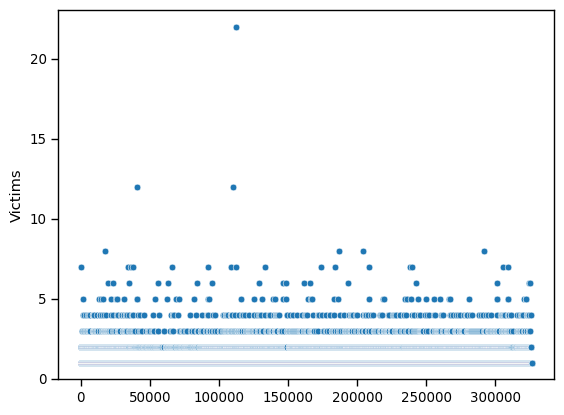

In [64]:
#gráfico de dispersão
sns.scatterplot(df['Victims'])

**Amostragem**

**Amostragem aleatória simples**: Neste tipo de amostragem, cada elemento do conjunto de dados tem uma chance igual de ser selecionado para a amostra. É o tipo mais comum de amostragem e é usado quando a população é homogênea e não há razão para suspeitar que alguns elementos sejam mais importantes que outros.

**Amostragem sistemática**: Neste tipo de amostragem, uma amostra é escolhida selecionando-se um ponto de partida aleatório e, em seguida, selecionando-se elementos a uma distância fixa desse ponto de partida. É uma opção conveniente quando a população é grande e não se tem uma lista completa dos elementos da população.

**Amostragem estratificada**: Neste tipo de amostragem, a população é dividida em estratos com base em alguma característica importante, e uma amostra é selecionada aleatoriamente em cada estrato. É utilizado quando se deseja garantir que certos grupos sejam representados na amostra.

**Amostragem por conglomerado**: Neste tipo de amostragem, a população é dividida em grupos maiores chamados conglomerados, e uma amostra aleatória de conglomerados é selecionada. Em seguida, todos os elementos dentro dos conglomerados selecionados são incluídos na amostra. É usado quando a população é muito grande e é difícil obter uma lista completa de todos os elementos.

**Amostragem estratificada**

In [65]:
# Dividindo a população em estratos com base no tipo de crime
tipos_crimes = df.groupby('CrimeName1')

# Selecionando uma amostra aleatória de cada estrato
amostras = [tipo_crime.sample(n=300, replace=True, random_state=3) for _, tipo_crime in tipos_crimes]

# Concatenando as amostras em um único conjunto de dados
amostra_final = pd.concat(amostras)

In [66]:
amostra_final['CrimeName1'].value_counts()

Crime Against Person      300
Crime Against Property    300
Crime Against Society     300
Not a Crime               300
Other                     300
Name: CrimeName1, dtype: int64

In [67]:
#Pegando as ocorrencias com mais vitimas
df_victims = df[df["Victims"] > 10]
df_concatenado = pd.concat([amostra_final, df_victims])

In [68]:
import folium

# Coordenadas de Maryland
maryland_lat = 39.045753
maryland_long = -76.641273

# Criando o mapa de maryland
maryland_map = folium.Map(location=[maryland_lat, maryland_long], zoom_start=10)

for index, row in df_concatenado.iterrows():
    #Plotar no mapa as ocorrencias com mais vitimas com as cores vermelhas
    if row["Victims"] >= 10:
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            #Fazendo a bolinha no mapa, fazendo o raio do círculo que será à quantidade de vítimas dividido por 5.
            radius=row['Victims'] / 5,
            color='red',
            #Se fill=True, o círculo será preenchido com a cor especificada por fill_color
            fill=True, 
            fill_color='red',
            fill_opacity=0.3,
            popup= row['City'] + ': ' + str(row['Victims']) + ' Vitimas' + ' Tipo do Crime: ' + row['CrimeName1']
        ).add_to(maryland_map)
        
    else:
        #Plotar as ocorrencias com até 9 vitimas
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius= row['Victims'] / 20,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.3,
            popup= row['City'] + ': ' + str(row['Victims']) + ' Vitimas' + ' Tipo do Crime: ' + row['CrimeName1']
        ).add_to(maryland_map)

# Exibe o mapa
maryland_map


- Os pontos em Vermelho são locais que teve mais de 9 vitimas

In [69]:
#df.corr()

# Data Preparation - Preparação dos Dados
* pré-processamento
* https://dnc.group/blog/data-science/metodologia-crisp-dm/

In [70]:
new_df = df[['Victims', 'CrimeName1', 'PoliceDistrictName', 'City', 'State', 'Latitude', 'Longitude']].copy()

In [71]:
new_df.isnull().sum()

Victims               0
CrimeName1            0
PoliceDistrictName    0
City                  0
State                 0
Latitude              0
Longitude             0
dtype: int64

In [72]:
new_df.duplicated().sum()

206656

In [73]:
new_df.drop_duplicates(inplace=True)

In [74]:
new_df.shape

(85337, 7)

## Label Encoder

No aprendizado de máquina, a codificação Label Encoder é o processo de converter os valores de uma  variável categórica em valores inteiros.
[label-encoding](https://www.statology.org/sklearn-label-encoding-multiple-columns/)

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
#Utilizando o labelEncoder na variavel target
lb_City = LabelEncoder()
new_df.loc[:, 'City'] = lb_City.fit_transform(new_df.loc[:, 'City']) 

In [77]:
#Utilizando o labelEncoder na variavel target
lb_State = LabelEncoder()
new_df.loc[:, 'State'] = lb_State.fit_transform(new_df.loc[:, 'State']) 

## Get_dummies - One-Hot-Encoding

Embora o Label Encoder seja direto, existe uma desvantagem de que os valores numéricos podem ser mal interpretados por algoritmos, como tendo algum tipo de hierarquia/ordem neles.

Nesta estratégia, cada valor de categoria é convertido em uma nova coluna e atribuído um valor 1 ou 0 (notação para verdadeiro/falso) à coluna.

In [78]:
new_df = pd.get_dummies(new_df, columns=['CrimeName1','PoliceDistrictName'], prefix=['CN', 'PDN'])
new_df

Victims  City  State   Latitude  Longitude  CN_Crime Against Person  \
0             1    39      0  39.036270 -77.049900                        0   
1             1    16      0  39.277840 -77.211500                        0   
4             1    22      0  39.198295 -77.244900                        0   
5             1    20      0  39.168194 -77.175049                        1   
6             1    37      0  39.103443 -77.155941                        0   
...         ...   ...    ...        ...        ...                      ...   
326152        1    37      0  39.073720 -77.139300                        0   
326154        1    39      0  39.092340 -76.984000                        1   
326159        1    36      0  38.992150 -77.192000                        0   
326176        1     6      0  38.982100 -77.119600                        0   
326190        1     6      0  39.000620 -77.135800                        0   

        CN_Crime Against Property  CN_Crime Against Society  CN_Not a Crime  \
0                               1                         0               0   
1                               0                         1               0   
4                               1                         0               0   
5                               0                         0               0   
6                               0                         1               0   
...                           ...                       ...             ...   
326152                          1                         0               0   
326154                          0                         0               0   
326159                          0                         0               0   
326176                          1                         0               0   
326190                          1                         0               0   

        CN_Other  PDN_BETHESDA  PDN_CITY OF TAKOMA PARK  PDN_GERMANTOWN  \
0              0             0                        0               0   
1              0             0                        0               1   
4              0             0                        0               1   
5              0             0                        0               0   
6              0             0                        0               0   
...          ...           ...                      ...             ...   
326152         0             0                        0               0   
326154         0             0                        0               0   
326159         1             1                        0               0   
326176         0             1                        0               0   
326190         0             1                        0               0   

        PDN_MONTGOMERY VILLAGE  PDN_ROCKVILLE  PDN_SILVER SPRING  PDN_WHEATON  
0                            0              0                  0            1  
1                            0              0                  0            0  
4                            0              0                  0            0  
5                            1              0                  0            0  
6                            0              1                  0            0  
...                        ...            ...                ...          ...  
326152                       0              1                  0            0  
326154                       0              0                  0            1  
326159                       0              0                  0            0  
326176                       0              0                  0            0  
326190                       0              0                  0            0  

[85337 rows x 17 columns]

In [79]:
new_df = new_df[['Victims', 'City', 'State',
       'CN_Crime Against Person', 'CN_Crime Against Property',
       'CN_Crime Against Society', 'CN_Not a Crime', 'CN_Other',
       'PDN_BETHESDA', 'PDN_CITY OF TAKOMA PARK', 'PDN_GERMANTOWN',
       'PDN_MONTGOMERY VILLAGE', 'PDN_ROCKVILLE', 'PDN_SILVER SPRING',
       'PDN_WHEATON', 'Latitude', 'Longitude']]

## Reescala dos dados

Às vezes, certos atributos têm escalas diferentes. Assim, pode ser útil realizar uma transformação para evitar que um atributo predomine sobre outro.

[pré-processamento-de-dados](https://medium.com/data-hackers/pré-processamento-de-dados-com-python-53b95bcf5ff4)



**Normalização**

normalização min-max, os valores min e max são definidos para os novos valores de cada atributo. Podendo apresentar 0 como valor mínimo e 1 como valor máximo, ou seja, os dados estão numa faixa de **0 a 1**.

Importante ressaltar que essa técnica funciona melhor se a **distribuição dos dados não for normal e se o desvio padrão for pequeno**, além disso o MinMaxScaler não reduz de forma eficaz o impacto de outliers e também preserva a distribuição original.

In [80]:
from sklearn.preprocessing import MinMaxScaler

minMax = MinMaxScaler()

norm_values = minMax.fit_transform(new_df.iloc[:,:15])

df_norm = pd.DataFrame(norm_values, columns = new_df.iloc[:,:15].columns)


In [81]:
df_norm

Victims      City  State  CN_Crime Against Person  \
0          0.0  0.886364    0.0                      0.0   
1          0.0  0.363636    0.0                      0.0   
2          0.0  0.500000    0.0                      0.0   
3          0.0  0.454545    0.0                      1.0   
4          0.0  0.840909    0.0                      0.0   
...        ...       ...    ...                      ...   
85332      0.0  0.840909    0.0                      0.0   
85333      0.0  0.886364    0.0                      1.0   
85334      0.0  0.818182    0.0                      0.0   
85335      0.0  0.136364    0.0                      0.0   
85336      0.0  0.136364    0.0                      0.0   

       CN_Crime Against Property  CN_Crime Against Society  CN_Not a Crime  \
0                            1.0                       0.0             0.0   
1                            0.0                       1.0             0.0   
2                            1.0                       0.0             0.0   
3                            0.0                       0.0             0.0   
4                            0.0                       1.0             0.0   
...                          ...                       ...             ...   
85332                        1.0                       0.0             0.0   
85333                        0.0                       0.0             0.0   
85334                        0.0                       0.0             0.0   
85335                        1.0                       0.0             0.0   
85336                        1.0                       0.0             0.0   

       CN_Other  PDN_BETHESDA  PDN_CITY OF TAKOMA PARK  PDN_GERMANTOWN  \
0           0.0           0.0                      0.0             0.0   
1           0.0           0.0                      0.0             1.0   
2           0.0           0.0                      0.0             1.0   
3           0.0           0.0                      0.0             0.0   
4           0.0           0.0                      0.0             0.0   
...         ...           ...                      ...             ...   
85332       0.0           0.0                      0.0             0.0   
85333       0.0           0.0                      0.0             0.0   
85334       1.0           1.0                      0.0             0.0   
85335       0.0           1.0                      0.0             0.0   
85336       0.0           1.0                      0.0             0.0   

       PDN_MONTGOMERY VILLAGE  PDN_ROCKVILLE  PDN_SILVER SPRING  PDN_WHEATON  
0                         0.0            0.0                0.0          1.0  
1                         0.0            0.0                0.0          0.0  
2                         0.0            0.0                0.0          0.0  
3                         1.0            0.0                0.0          0.0  
4                         0.0            1.0                0.0          0.0  
...                       ...            ...                ...          ...  
85332                     0.0            1.0                0.0          0.0  
85333                     0.0            0.0                0.0          1.0  
85334                     0.0            0.0                0.0          0.0  
85335                     0.0            0.0                0.0          0.0  
85336                     0.0            0.0                0.0          0.0  

[85337 rows x 15 columns]

In [82]:
df_teste = df_norm.iloc[-5:]

In [83]:
df_teste

Victims      City  State  CN_Crime Against Person  \
85332      0.0  0.840909    0.0                      0.0   
85333      0.0  0.886364    0.0                      1.0   
85334      0.0  0.818182    0.0                      0.0   
85335      0.0  0.136364    0.0                      0.0   
85336      0.0  0.136364    0.0                      0.0   

       CN_Crime Against Property  CN_Crime Against Society  CN_Not a Crime  \
85332                        1.0                       0.0             0.0   
85333                        0.0                       0.0             0.0   
85334                        0.0                       0.0             0.0   
85335                        1.0                       0.0             0.0   
85336                        1.0                       0.0             0.0   

       CN_Other  PDN_BETHESDA  PDN_CITY OF TAKOMA PARK  PDN_GERMANTOWN  \
85332       0.0           0.0                      0.0             0.0   
85333       0.0           0.0                      0.0             0.0   
85334       1.0           1.0                      0.0             0.0   
85335       0.0           1.0                      0.0             0.0   
85336       0.0           1.0                      0.0             0.0   

       PDN_MONTGOMERY VILLAGE  PDN_ROCKVILLE  PDN_SILVER SPRING  PDN_WHEATON  
85332                     0.0            1.0                0.0          0.0  
85333                     0.0            0.0                0.0          1.0  
85334                     0.0            0.0                0.0          0.0  
85335                     0.0            0.0                0.0          0.0  
85336                     0.0            0.0                0.0          0.0

In [84]:
df_norm = df_norm.iloc[:-5:]

In [85]:
df_norm

Victims      City  State  CN_Crime Against Person  \
0      0.000000  0.886364    0.0                      0.0   
1      0.000000  0.363636    0.0                      0.0   
2      0.000000  0.500000    0.0                      0.0   
3      0.000000  0.454545    0.0                      1.0   
4      0.000000  0.840909    0.0                      0.0   
...         ...       ...    ...                      ...   
85327  0.000000  0.886364    0.0                      1.0   
85328  0.000000  0.931818    0.0                      0.0   
85329  0.000000  0.840909    0.0                      0.0   
85330  0.047619  0.454545    0.0                      1.0   
85331  0.000000  0.886364    0.0                      0.0   

       CN_Crime Against Property  CN_Crime Against Society  CN_Not a Crime  \
0                            1.0                       0.0             0.0   
1                            0.0                       1.0             0.0   
2                            1.0                       0.0             0.0   
3                            0.0                       0.0             0.0   
4                            0.0                       1.0             0.0   
...                          ...                       ...             ...   
85327                        0.0                       0.0             0.0   
85328                        0.0                       0.0             0.0   
85329                        0.0                       0.0             0.0   
85330                        0.0                       0.0             0.0   
85331                        0.0                       0.0             0.0   

       CN_Other  PDN_BETHESDA  PDN_CITY OF TAKOMA PARK  PDN_GERMANTOWN  \
0           0.0           0.0                      0.0             0.0   
1           0.0           0.0                      0.0             1.0   
2           0.0           0.0                      0.0             1.0   
3           0.0           0.0                      0.0             0.0   
4           0.0           0.0                      0.0             0.0   
...         ...           ...                      ...             ...   
85327       0.0           0.0                      0.0             0.0   
85328       1.0           0.0                      0.0             0.0   
85329       1.0           0.0                      0.0             0.0   
85330       0.0           0.0                      0.0             0.0   
85331       1.0           1.0                      0.0             0.0   

       PDN_MONTGOMERY VILLAGE  PDN_ROCKVILLE  PDN_SILVER SPRING  PDN_WHEATON  
0                         0.0            0.0                0.0          1.0  
1                         0.0            0.0                0.0          0.0  
2                         0.0            0.0                0.0          0.0  
3                         1.0            0.0                0.0          0.0  
4                         0.0            1.0                0.0          0.0  
...                       ...            ...                ...          ...  
85327                     0.0            0.0                0.0          1.0  
85328                     0.0            0.0                1.0          0.0  
85329                     0.0            0.0                0.0          1.0  
85330                     1.0            0.0                0.0          0.0  
85331                     0.0            0.0                0.0          0.0  

[85332 rows x 15 columns]

In [86]:
df_norm.min(), df_norm.max()

(Victims                      0.0
 City                         0.0
 State                        0.0
 CN_Crime Against Person      0.0
 CN_Crime Against Property    0.0
 CN_Crime Against Society     0.0
 CN_Not a Crime               0.0
 CN_Other                     0.0
 PDN_BETHESDA                 0.0
 PDN_CITY OF TAKOMA PARK      0.0
 PDN_GERMANTOWN               0.0
 PDN_MONTGOMERY VILLAGE       0.0
 PDN_ROCKVILLE                0.0
 PDN_SILVER SPRING            0.0
 PDN_WHEATON                  0.0
 dtype: float64,
 Victims                      1.0
 City                         1.0
 State                        0.0
 CN_Crime Against Person      1.0
 CN_Crime Against Property    1.0
 CN_Crime Against Society     1.0
 CN_Not a Crime               1.0
 CN_Other                     1.0
 PDN_BETHESDA                 1.0
 PDN_CITY OF TAKOMA PARK      1.0
 PDN_GERMANTOWN               1.0
 PDN_MONTGOMERY VILLAGE       1.0
 PDN_ROCKVILLE                1.0
 PDN_SILVER SPRING            1

**Padronização**

Normalização por **padronização** (ou padronização): Usa a média e o desvio padrão. O resultado disso é uma **média igual a 0 e um desvio padrão igual a 1**.

Esse método trabalha melhor em dados com **distribuição normal** porém vale a tentativa para outros tipos de distribuições.

In [90]:
#Padronizando os dados
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
padro_values = scaler_standard.fit_transform(new_df)
df_padro = pd.DataFrame(padro_values, columns = new_df.columns)
df_padro

Victims      City  State  CN_Crime Against Person  \
0     -0.190405  0.941023    0.0                -0.436418   
1     -0.190405 -1.079930    0.0                -0.436418   
2     -0.190405 -0.552725    0.0                -0.436418   
3     -0.190405 -0.728460    0.0                 2.291380   
4     -0.190405  0.765288    0.0                -0.436418   
...         ...       ...    ...                      ...   
85332 -0.190405  0.765288    0.0                -0.436418   
85333 -0.190405  0.941023    0.0                 2.291380   
85334 -0.190405  0.677420    0.0                -0.436418   
85335 -0.190405 -1.958605    0.0                -0.436418   
85336 -0.190405 -1.958605    0.0                -0.436418   

       CN_Crime Against Property  CN_Crime Against Society  CN_Not a Crime  \
0                       1.182677                 -0.400283       -0.151956   
1                      -0.845540                  2.498230       -0.151956   
2                       1.182677                 -0.400283       -0.151956   
3                      -0.845540                 -0.400283       -0.151956   
4                      -0.845540                  2.498230       -0.151956   
...                          ...                       ...             ...   
85332                   1.182677                 -0.400283       -0.151956   
85333                  -0.845540                 -0.400283       -0.151956   
85334                  -0.845540                 -0.400283       -0.151956   
85335                   1.182677                 -0.400283       -0.151956   
85336                   1.182677                 -0.400283       -0.151956   

       CN_Other  PDN_BETHESDA  PDN_CITY OF TAKOMA PARK  PDN_GERMANTOWN  \
0     -0.596529     -0.449460                -0.122073       -0.405725   
1     -0.596529     -0.449460                -0.122073        2.464724   
2     -0.596529     -0.449460                -0.122073        2.464724   
3     -0.596529     -0.449460                -0.122073       -0.405725   
4     -0.596529     -0.449460                -0.122073       -0.405725   
...         ...           ...                      ...             ...   
85332 -0.596529     -0.449460                -0.122073       -0.405725   
85333 -0.596529     -0.449460                -0.122073       -0.405725   
85334  1.676364      2.224892                -0.122073       -0.405725   
85335 -0.596529      2.224892                -0.122073       -0.405725   
85336 -0.596529      2.224892                -0.122073       -0.405725   

       PDN_MONTGOMERY VILLAGE  PDN_ROCKVILLE  PDN_SILVER SPRING  PDN_WHEATON  \
0                   -0.430257      -0.413955          -0.436171     1.918895   
1                   -0.430257      -0.413955          -0.436171    -0.521133   
2                   -0.430257      -0.413955          -0.436171    -0.521133   
3                    2.324194      -0.413955          -0.436171    -0.521133   
4                   -0.430257       2.415721          -0.436171    -0.521133   
...                       ...            ...                ...          ...   
85332               -0.430257       2.415721          -0.436171    -0.521133   
85333               -0.430257      -0.413955          -0.436171     1.918895   
85334               -0.430257      -0.413955          -0.436171    -0.521133   
85335               -0.430257      -0.413955          -0.436171    -0.521133   
85336               -0.430257      -0.413955          -0.436171    -0.521133   

       Latitude  Longitude  
0      0.015268  -0.024175  
1      0.152547  -0.070741  
2      0.107343  -0.080366  
3      0.090237  -0.060238  
4      0.053441  -0.054731  
...         ...        ...  
85332  0.036550  -0.049936  
85333  0.047131  -0.005185  
85334 -0.009804  -0.065122  
85335 -0.015515  -0.044259  
85336 -0.004991  -0.048928  

[85337 rows x 17 columns]

In [91]:
df_padro.mean(), df_padro.std()

(Victims                      4.682170e-14
 City                        -1.042647e-15
 State                        0.000000e+00
 CN_Crime Against Person      6.181008e-14
 CN_Crime Against Property    6.219933e-14
 CN_Crime Against Society     7.150828e-14
 CN_Not a Crime              -2.806710e-14
 CN_Other                    -2.822290e-13
 PDN_BETHESDA                -8.448920e-16
 PDN_CITY OF TAKOMA PARK     -1.332920e-14
 PDN_GERMANTOWN               7.155995e-15
 PDN_MONTGOMERY VILLAGE       1.048331e-14
 PDN_ROCKVILLE                2.965785e-15
 PDN_SILVER SPRING           -5.049410e-15
 PDN_WHEATON                  1.550664e-14
 Latitude                    -2.324080e-16
 Longitude                   -2.463222e-16
 dtype: float64,
 Victims                      1.000006
 City                         1.000006
 State                        0.000000
 CN_Crime Against Person      1.000006
 CN_Crime Against Property    1.000006
 CN_Crime Against Society     1.000006
 CN_Not a Crime   

In [92]:
new_df.iloc[:-5,15:17]

Latitude  Longitude
0       39.036270 -77.049900
1       39.277840 -77.211500
4       39.198295 -77.244900
5       39.168194 -77.175049
6       39.103443 -77.155941
...           ...        ...
326112  39.049140 -77.071100
326117  38.994140 -76.995300
326122  39.067010 -77.094400
326130  39.117420 -77.199000
326136  39.022490 -77.061400

[85332 rows x 2 columns]

**train_test_split**

In [93]:
df_norm

Victims      City  State  CN_Crime Against Person  \
0      0.000000  0.886364    0.0                      0.0   
1      0.000000  0.363636    0.0                      0.0   
2      0.000000  0.500000    0.0                      0.0   
3      0.000000  0.454545    0.0                      1.0   
4      0.000000  0.840909    0.0                      0.0   
...         ...       ...    ...                      ...   
85327  0.000000  0.886364    0.0                      1.0   
85328  0.000000  0.931818    0.0                      0.0   
85329  0.000000  0.840909    0.0                      0.0   
85330  0.047619  0.454545    0.0                      1.0   
85331  0.000000  0.886364    0.0                      0.0   

       CN_Crime Against Property  CN_Crime Against Society  CN_Not a Crime  \
0                            1.0                       0.0             0.0   
1                            0.0                       1.0             0.0   
2                            1.0                       0.0             0.0   
3                            0.0                       0.0             0.0   
4                            0.0                       1.0             0.0   
...                          ...                       ...             ...   
85327                        0.0                       0.0             0.0   
85328                        0.0                       0.0             0.0   
85329                        0.0                       0.0             0.0   
85330                        0.0                       0.0             0.0   
85331                        0.0                       0.0             0.0   

       CN_Other  PDN_BETHESDA  PDN_CITY OF TAKOMA PARK  PDN_GERMANTOWN  \
0           0.0           0.0                      0.0             0.0   
1           0.0           0.0                      0.0             1.0   
2           0.0           0.0                      0.0             1.0   
3           0.0           0.0                      0.0             0.0   
4           0.0           0.0                      0.0             0.0   
...         ...           ...                      ...             ...   
85327       0.0           0.0                      0.0             0.0   
85328       1.0           0.0                      0.0             0.0   
85329       1.0           0.0                      0.0             0.0   
85330       0.0           0.0                      0.0             0.0   
85331       1.0           1.0                      0.0             0.0   

       PDN_MONTGOMERY VILLAGE  PDN_ROCKVILLE  PDN_SILVER SPRING  PDN_WHEATON  
0                         0.0            0.0                0.0          1.0  
1                         0.0            0.0                0.0          0.0  
2                         0.0            0.0                0.0          0.0  
3                         1.0            0.0                0.0          0.0  
4                         0.0            1.0                0.0          0.0  
...                       ...            ...                ...          ...  
85327                     0.0            0.0                0.0          1.0  
85328                     0.0            0.0                1.0          0.0  
85329                     0.0            0.0                0.0          1.0  
85330                     1.0            0.0                0.0          0.0  
85331                     0.0            0.0                0.0          0.0  

[85332 rows x 15 columns]

In [94]:
new_df.iloc[:-5,15:17]

Latitude  Longitude
0       39.036270 -77.049900
1       39.277840 -77.211500
4       39.198295 -77.244900
5       39.168194 -77.175049
6       39.103443 -77.155941
...           ...        ...
326112  39.049140 -77.071100
326117  38.994140 -76.995300
326122  39.067010 -77.094400
326130  39.117420 -77.199000
326136  39.022490 -77.061400

[85332 rows x 2 columns]

In [95]:
X_norm = df_norm.values
y_norm = new_df.iloc[:-5,15:17].values

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm,
                                                    y_norm,
                                                    test_size=0.25,
                                                    random_state=123
                                                       )

**KFold do sklearn**

O KFold facilita que possamos separar o nosso conjunto de dados em conjunto de treinos e teste K vezes (indicado no parâmetro **n_splits**) e portanto fazer o treino e validar os resultados.

[k-fold](https://vitalflux.com/k-fold-cross-validation-python-example/)



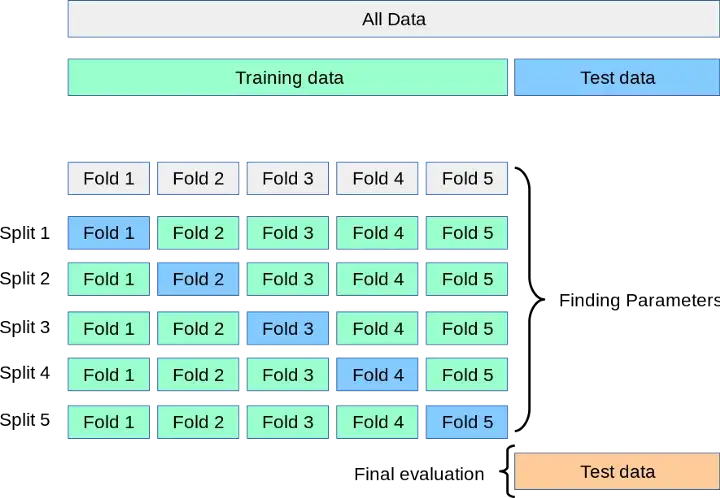

# Modeling - Modelagem
- https://dnc.group/blog/data-science/metodologia-crisp-dm/


## Regressão linear

A regressão linear é um modelo bastante simples e possui poucos hiperparâmetros para ajustar:

fit_intercept: define se a intercepção da reta deve ser calculada pelo modelo ou forçada a ser zero. O valor padrão é True.
normalize: define se os dados de entrada devem ser normalizados antes do treinamento. O valor padrão é False.
copy_X: define se uma cópia dos dados de entrada deve ser feita ou se eles devem ser modificados in-place. O valor padrão é True.

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred = clf.predict(X_test)

print(f"MSE de Teste: {mean_squared_error(y_test, y_pred):1.1f}")
print(f"MAE de Teste: {mean_absolute_error(y_test, y_pred):1.1f}")

MSE de Teste: 6.8
MAE de Teste: 0.2


# Evaluation - Avaliação do Modelo

In [99]:
df_teste

Victims      City  State  CN_Crime Against Person  \
85332      0.0  0.840909    0.0                      0.0   
85333      0.0  0.886364    0.0                      1.0   
85334      0.0  0.818182    0.0                      0.0   
85335      0.0  0.136364    0.0                      0.0   
85336      0.0  0.136364    0.0                      0.0   

       CN_Crime Against Property  CN_Crime Against Society  CN_Not a Crime  \
85332                        1.0                       0.0             0.0   
85333                        0.0                       0.0             0.0   
85334                        0.0                       0.0             0.0   
85335                        1.0                       0.0             0.0   
85336                        1.0                       0.0             0.0   

       CN_Other  PDN_BETHESDA  PDN_CITY OF TAKOMA PARK  PDN_GERMANTOWN  \
85332       0.0           0.0                      0.0             0.0   
85333       0.0           0.0                      0.0             0.0   
85334       1.0           1.0                      0.0             0.0   
85335       0.0           1.0                      0.0             0.0   
85336       0.0           1.0                      0.0             0.0   

       PDN_MONTGOMERY VILLAGE  PDN_ROCKVILLE  PDN_SILVER SPRING  PDN_WHEATON  
85332                     0.0            1.0                0.0          0.0  
85333                     0.0            0.0                0.0          1.0  
85334                     0.0            0.0                0.0          0.0  
85335                     0.0            0.0                0.0          0.0  
85336                     0.0            0.0                0.0          0.0

In [100]:
y_pred = clf.predict(df_teste.values)
y_pred

array([[ 39.04804993, -77.11676025],
       [ 39.02548981, -76.93766785],
       [ 38.96155548, -77.05186462],
       [ 38.90439987, -76.90086365],
       [ 38.90439987, -76.90086365]])

In [101]:
df[df['Longitude'] == -76.90086365] #Fazendo uma busca para ver se tem no DF

Empty DataFrame
Columns: [IncidentId, OffenceCode, CrNumber, DispatchDate/Time, NibrsCode, Victims, CrimeName1, CrimeName2, CrimeName3, PoliceDistrictName, BlockAddress, City, State, ZipCode, Agency, Place, Sector, Beat, Pra, AddressNumber, StreetPrefix, StreetName, StreetSuffix, StreetType, Start_Date_Time, End_Date_Time, Latitude, Longitude, PoliceDistrictNumber, Location]
Index: []

[0 rows x 30 columns]

In [102]:
# Coordenadas de Maryland
maryland_lat = 39.045753
maryland_long = -76.641273

# Criando o mapa de maryland
maryland_map = folium.Map(location=[maryland_lat, maryland_long], zoom_start=10)

for index, row in df_concatenado.iterrows():
    #Plotar no mapa as ocorrencias com mais vitimas com as cores vermelhas
    if row["Victims"] >= 10:
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            #Fazendo a bolinha no mapa, fazendo o raio do círculo que será à quantidade de vítimas dividido por 5.
            radius=row['Victims'] / 5,
            color='red',
            #Se fill=True, o círculo será preenchido com a cor especificada por fill_color
            fill=True, 
            fill_color='red',
            fill_opacity=0.3,
            popup= row['City'] + ': ' + str(row['Victims']) + ' Vitimas' + ' Tipo do Crime: ' + row['CrimeName1']
        ).add_to(maryland_map)
        
    else:
        #Plotar as ocorrencias com até 9 vitimas
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius= row['Victims'] / 20,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.3,
            popup= row['City'] + ': ' + str(row['Victims']) + ' Vitimas' + ' Tipo do Crime: ' + row['CrimeName1']
        ).add_to(maryland_map)
        
        
for c in y_pred:        
    folium.CircleMarker(
        location=[c[0], c[1]],
        radius= len(y_pred),
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.3
    ).add_to(maryland_map)
        
# Exibe o mapa
maryland_map


# Deployment